In [1]:
import pandas as pd
import seaborn as sb

In [4]:
states = pd.read_csv('us-states.csv')

In [16]:
pops = pd.read_csv('../ray-covid/state_pops.csv')

In [19]:
states = pd.merge(states, pops, how='left', left_on='state', right_on='Name')

In [23]:
states['per_100k'] = (states['cases'] / states['Population']) * 100000

In [24]:
states.head()

,date,state,fips,cases,deaths,Name,FIPS,Abbrev,Population,per_100k
0,2020-01-21,Washington,53,1,0,Washington,53.0,WA,7614893.0,0.013132
1,2020-01-22,Washington,53,1,0,Washington,53.0,WA,7614893.0,0.013132
2,2020-01-23,Washington,53,1,0,Washington,53.0,WA,7614893.0,0.013132
3,2020-01-24,Illinois,17,1,0,Illinois,17.0,IL,12671821.0,0.007892
4,2020-01-24,Washington,53,1,0,Washington,53.0,WA,7614893.0,0.013132


In [13]:
sb.set(rc={'figure.figsize':(18,12)})

In [15]:
states['date'].max()

'2020-07-21'

In [45]:
june = states.loc[(states.date == '2020-05-01'), :]

june.loc[(june.per_100k >= 1000), :]

,date,state,fips,cases,deaths,Name,FIPS,Abbrev,Population,per_100k
3290,2020-05-01,New Jersey,34,121190,7538,New Jersey,34.0,NJ,8882190.0,1364.415758
3292,2020-05-01,New York,36,313575,23841,New York,36.0,NY,19453561.0,1611.915680


In [ ]:
bad_states = states.loc[(states.loc[(date)]), :]

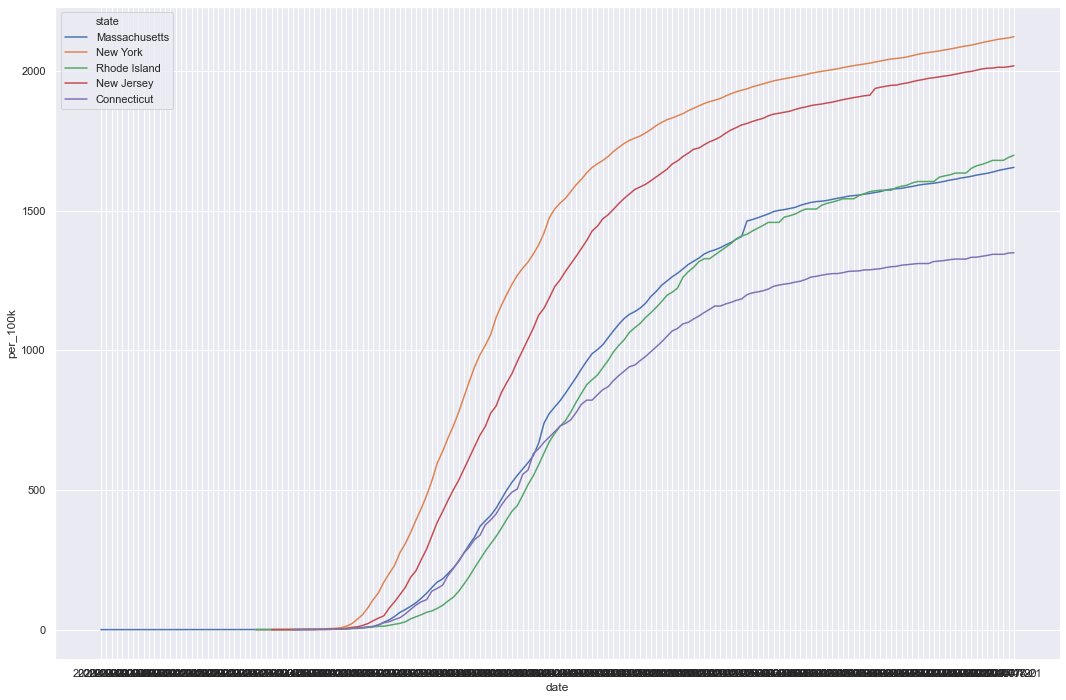

In [46]:
ax = sb.lineplot(x="date", y="per_100k", hue="state", data=states.loc[(states.Abbrev.isin(['CT', 'MA', 'NY','NJ', 'RI']))])
#ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

ax